In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from __future__ import division
from scipy import stats
import re

In [2]:
def find_pattern(pattern, behave):
    match = re.search(pattern, behave)
    if match:
        return True
    else:
        return False

In [3]:
def line_plot(y,x_tickLabels = None, y_ticks = None, y_tickLabels = None, title = None):
    plt.style.use('ggplot')
    fig = plt.figure()
    
    ax = fig.add_axes([0,0,1,1])
    plot = ax.plot(np.array(range(len(y))), y)
    
    if title is not None:
        ax.set_title(title)
    
    ax.set_xticks(range(len(y)))
    if x_tickLabels is not None:
        ax.set_xticklabels(x_tickLabels)
    
    if y_ticks is not None:
        ax.set_yticks(y_ticks)
    if y_tickLabels is not None:
        ax.set_yticklabels(y_ticksLabels)

In [4]:
def bar_plot(y,x_tickLabels = None, y_ticks = None, y_tickLabels = None, title = None):
    plt.style.use('ggplot')
    fig = plt.figure()
    
    ax = fig.add_axes([0,0,1,1])
    plot = ax.bar(range(len(y)), y, width = 0.5)
    
    if title is not None:
        ax.set_title(title)
    
    ax.set_xticks(np.array(range(len(y))) + 0.25)
    if x_tickLabels is not None:
        ax.set_xticklabels(x_tickLabels)
    
    if y_ticks is not None:
        ax.set_yticks(y_ticks)
    if y_tickLabels is not None:
        ax.set_yticklabels(y_ticksLabels)

In [5]:
def compare_dif_group_bar(group1, group2, group1_tick, group2_tick, sharey, log = False, title1 = None, title2 = None):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = sharey, figsize = (10,5))
    fig.tight_layout()
    ax1.bar(left = range(len(group1)), height = group1, tick_label = group1_tick, align = 'center', log = log)
    if title1 is not None:
        ax1.set_title(title1)
    for i,v in enumerate(group1):
        ax1.text(x = i - 0.25, y = v + 0.02, s = str(v))
    ax2.bar(left = range(len(group2)), height = group2, tick_label = group2_tick, align = 'center', log = log)
    if title2 is not None:
        ax2.set_title(title2)
    for i,v in enumerate(group2):
        ax2.text(x = i - 0.25, y = v + 0.02, s = str(v))

In [6]:
def compare_groups_bar(groups, group_ticks,sharey, titles, log = False):
    fig, axes = plt.subplots(ncols = len(groups), sharey = sharey, figsize = (12,5))
    fig.tight_layout()
    for i in xrange(len(groups)):
        axes[i].bar(left = range(len(groups[i])), height = groups[i], tick_label = group_ticks[i], align = 'center', log = log)
        axes[i].set_title(titles[i])
        for i,v in enumerate(group1):
            axes[i].text(x = i - 0.25, y = v + 0.02, s = str(v))

In [7]:
def chi_square_test(table, nul_hyp, alt_hyp, sig_level = 0.05):
    x_square, p_value, df, expected_fre = stats.chi2_contingency(table)
    print 'x_sqaure statistics is ', x_square
    print 'p_value is ', p_value
    print 'significant level is ', sig_level
    if p_value < sig_level:
        print alt_hyp
    else:
        print nul_hyp

# What's our conversion ratio?
    it's ratio of # of users signing up successfully to total number of users

In [8]:
df = pd.read_csv('data/users_data.csv')

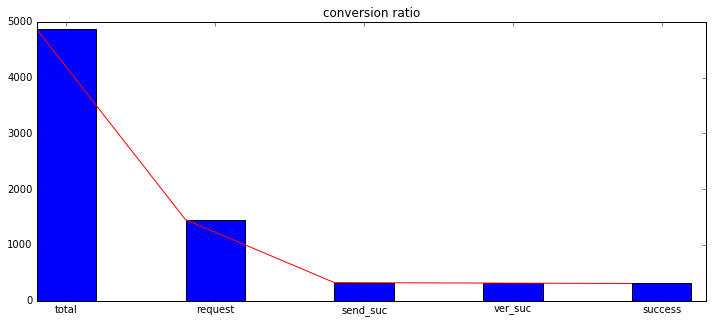

In [9]:
total = df.shape[0]
request = df[(df.request > 0)].shape[0]
send_suc = df[(df.send_suc == 1)].shape[0]
ver_suc = df[(df.ver_suc == 1)].shape[0]
success = df[(df.isSuccess == 1)].shape[0]

conversion = [total, request, send_suc, ver_suc, success]
title = 'conversion ratio'
x_tickLable = ['total', 'request', 'send_suc','ver_suc', 'success']
y_ticks = conversion
fig, ax = plt.subplots(figsize = (12,5))
ax.plot(np.array(range(len(conversion))), conversion, color = 'red')
ax.bar(np.array(range(len(conversion))), conversion, width = 0.4)
ax.set_title(title)
ax.set_xticks(np.arange(5) + 0.2)
ax.set_xticklabels(x_tickLable)

# Get insight into users' behavior pattern

## first we look at patterns from start to request

#### dive into pages with application button

In [18]:
df.behavior_list.value_counts()

[]                                                                                                                                                                                                                                                  2211
[index, request]                                                                                                                                                                                                                                     488
[index, cli_document]                                                                                                                                                                                                                                137
[index, cli_product]                                                                                                                                                                                                                                 110
[ind

In [19]:
index_pat = r', index, request'
demo_pat = r', demo, request'
about_pat = r', about, request'
# courses_index_pat = r'courses_index, request' # vido_pat = r'cli_video.*request'

In [11]:
index_request_df = df[(df.behavior_list.apply(lambda x: find_pattern(index_pat,x)))]
index_not_request_df = df[(df.behavior_list.apply(lambda x: 'index' in x)) 
                         & (df.behavior_list.apply(lambda x: 'request' not in x))] 

In [21]:
demo_request = df[(df.behavior_list.apply(lambda x: find_pattern(demo_pat,x)))].shape[0]
demo_not_request = df[(df.behavior_list.apply(lambda x: ', demo,' in x)) 
                         & (df.behavior_list.apply(lambda x: 'request' not in x))].shape[0]

In [22]:
print demo_request
print demo_not_request

161
73


In [13]:
about_request = df[(df.behavior_list.apply(lambda x: find_pattern(about_pat,x)))].shape[0]
about_not_request = df[(df.behavior_list.apply(lambda x: 'about' in x)) 
                         & (df.behavior_list.apply(lambda x: 'request' not in x))].shape[0]

In [14]:
# cou_index_request = df[(df.behavior_list.apply(lambda x: find_pattern(courses_index_pat,x)))].shape[0]
# cou_index_not_request = df[(df.behavior_list.apply(lambda x: 'courses_index' in x)) 
#                          & (df.behavior_list.apply(lambda x: 'request' not in x))].shape[0]
play_request = sum((df.play_video > 0) & (df.request > 0))
play_not_request = sum((df.play_video > 0) & (df.request == 0))

In [15]:
request = [index_request_df.shape[0],demo_request,about_request,play_request]
not_request = [index_not_request_df.shape[0],demo_not_request,about_not_request,play_not_request]

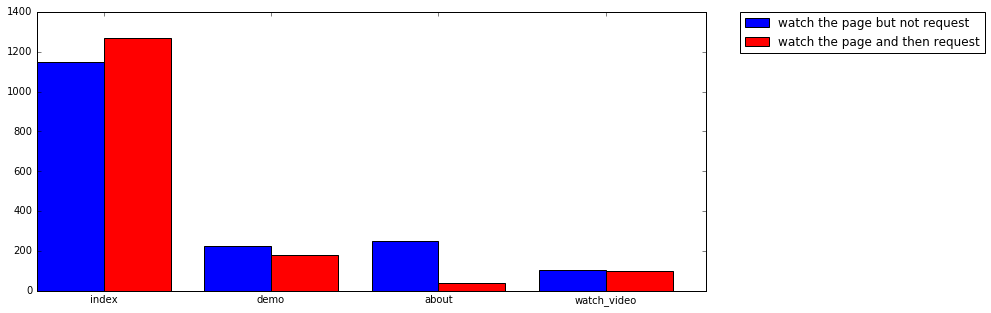

In [16]:
xlabel = ['index', 'demo', 'about', 'watch_video']
fig, ax = plt.subplots(figsize = (12,5))
ax.bar(left = range(1,5), height = not_request, width = 0.4, label = 'watch the page but not request')
ax.bar(left = np.arange(1, 5) + 0.4, height = request, width = 0.4, color = 'red', label = 'watch the page and then request')
ax.set_xticks(np.arange(1,5) + 0.4)
ax.set_xticklabels(xlabel)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### let's look at demo

In [ ]:
no_demo_not_request = df[(df.behavior_list.apply(lambda x: 'demo' not in x)) 
                         & (df.behavior_list.apply(lambda x: 'request' not in x))].shape[0]
no_demo_request = df[(df.behavior_list.apply(lambda x: 'demo' not in x)) 
                         & (df.behavior_list.apply(lambda x: 'request' in x))].shape[0]

In [ ]:
demo = [demo_not_request, demo_request]
no_demo = [no_demo_not_request, no_demo_request]

demo_tick = ('demo_not_request', 'demo_request')
no_demo_tick = ('no_demo_not_request', 'no_demo_request')

demo_tit = 'number of users signing or not watching demo'
no_demo_tit = 'number of users signing or not without demo'

In [ ]:
compare_dif_group_bar(demo, no_demo, demo_tick, no_demo_tick, sharey = True, title1 = demo_tit, title2 = no_demo_tit)

In [ ]:
demo_ratio = [demo_not_request/(demo_not_request + demo_request), demo_request/(demo_not_request + demo_request)]
no_demo_ratio = [no_demo_not_request/(no_demo_not_request + no_demo_request), no_demo_request/((no_demo_not_request + no_demo_request))]
title1 = 'percentage of signing or not watching demo'
title2 = 'percentage of signing or not without demo'
compare_dif_group_bar(demo_ratio, no_demo_ratio, demo_tick, no_demo_tick, sharey = True, title1 = title1, title2 = title2)

    use chi-square test to test it , it's subject to assumption of chi-square test
        randomly sampled, 
        related to categorical features 
        number in each cell of contincy table is more than 5

In [ ]:
demo_or_not_table = np.array([[demo_not_request, demo_request],[no_demo_not_request, no_demo_request]])
nul_hyp = 'there is no difference between watching demo or not impacting on signing up'
alt_hyp = 'there is significant difference between watching demo or not impacting on signing up'
chi_square_test(demo_or_not_table, nul_hyp = nul_hyp, alt_hyp = alt_hyp)

## second, let's look at about 

In [ ]:
no_about_not_request = df[(df.behavior_list.apply(lambda x: 'about' not in x)) 
                         & (df.behavior_list.apply(lambda x: 'request' not in x))].shape[0]
no_about_request = df[(df.behavior_list.apply(lambda x: 'about' not in x)) 
                         & (df.behavior_list.apply(lambda x: 'request' in x))].shape[0]

In [ ]:
about = [about_not_request, about_request]
no_about = [no_about_not_request, no_about_request]

about_tick = ('about_not_request', 'about_request')
no_about_tick = ('no_about_not_request', 'no_about_request')

about_tit = 'number of users signing or not watching about'
no_about_tit = 'number of users signing or not without about'

In [ ]:
compare_dif_group_bar(about, no_about, about_tick, no_about_tick, sharey = True, title1 = about_tit, title2 = no_about_tit)

In [ ]:
about_ratio = [about_not_request/(about_not_request + about_request), about_request/(about_not_request + about_request)]
no_about_ratio = [no_about_not_request/(no_about_not_request + no_about_request), no_about_request/((no_about_not_request + no_about_request))]
title1 = 'percentage of signing or not watching about'
title2 = 'percentage of signing or not without about'
compare_dif_group_bar(about_ratio, no_about_ratio, about_tick, no_about_tick, sharey = True, title1 = title1, title2 = title2)

    use chi-square test to test it , it's subject to assumption of chi-square test
        randomly sampled, 
        related to categorical features 
        number in each cell of contincy table is more than 5

In [ ]:
about_or_not_table = np.array([[about_not_request, about_request],[no_about_not_request, no_about_request]])
nul_hyp = 'there is no difference between watching about or not impacting on signing up'
alt_hyp = 'there is significant difference between watching about or not impacting on signing up'
chi_square_test(about_or_not_table, nul_hyp = nul_hyp, alt_hyp = alt_hyp)

## third, let's look at video

### Although someone is at video page, he/she didn't actually watch video

In [ ]:
no_video_not_request = sum((df.cou))
no_video_request = 

vedioPage_not_request = 
vedioPage_request = 

watch_not_request = 
watch_request = 

In [ ]:
course_index = [cou_index_not_request, cou_index_request]
no_course_index = [no_cou_index_not_request, no_cou_index_request]

cou_index_tick = ('courses_index_not_request', 'courses_index_request')
no_cou_index_tick = ('no_courses_index_not_request', 'no_courses_index_request')

cou_index_tit = 'number of users signing or not watching about'
no_cou_index_tit = 'number of users signing or not without about'

In [ ]:
compare_dif_group_bar(course_index, no_course_index, cou_index_tick, no_cou_index_tick, 
                      sharey = True, title1 = cou_index_tit, title2 = no_cou_index_tit)

In [ ]:
about_ratio = [about_not_request/(about_not_request + about_request), about_request/(about_not_request + about_request)]
no_about_ratio = [no_about_not_request/(no_about_not_request + no_about_request), no_about_request/((no_about_not_request + no_about_request))]
title1 = 'percentage of signing or not watching about'
title2 = 'percentage of signing or not without about'
compare_dif_group_bar(about_ratio, no_about_ratio, about_tick, no_about_tick, sharey = True, title1 = title1, title2 = title2)

    use chi-square test to test it , it's subject to assumption of chi-square test
        randomly sampled, 
        related to categorical features 
        number in each cell of contincy table is more than 5

In [ ]:
about_or_not_table = np.array([[about_not_request, about_request],[no_about_not_request, no_about_request]])
nul_hyp = 'there is no difference between watching about or not impacting on signing up'
alt_hyp = 'there is significant difference between watching about or not impacting on signing up'
chi_square_test(about_or_not_table, nul_hyp = nul_hyp, alt_hyp = alt_hyp)

#### Dive into pages without directly access to application

In [ ]:
prod_pat = r'cli_product.*request'
brou_pat = r'cli_bround.*request'
docu_pat = r'cli_document.*request'

# Classify users into different cases
    1. Not interested, just viewed page once and left (we don't need to pay attention to this group of users)
    2. Interested(viewed multi-pages)
            a. choose not to sign up
            b. choose to sign up(btnClick and request)
                    i. successed
                    ii. failed  
    As follows, data contains old users who are willing to sign up(name = request) and new users with more than twice actions.

In [ ]:
df.project.value_counts(dropna = False)

# What features can impact on signing up or not

In [ ]:
df.shape

In [ ]:
df.columns

###    Chrome VS others

In [ ]:
browser_count = df.browser.value_counts()
x_tickLabel = browser_count.index
y = browser_count.values
title = 'distribution of browser'
bar_plot(y = y, x_tickLabels = x_tickLabel, title = title)

In [ ]:
chrome_not = df[(df.browser == 'chrome') & (df.isSuccess == 0)].shape[0]
chrome_sign = df[(df.browser == 'chrome') & (df.isSuccess == 1)].shape[0]
other_not = df[(df.browser != 'chrome') & (df.isSuccess == 0)].shape[0]
other_sign = df[(df.browser != 'chrome')  & (df.isSuccess == 1)].shape[0]

In [ ]:
chrome = [chrome_not, chrome_sign]
other = [other_not, other_sign]
chrome_tick = ('chrom_not_sign', 'chrome_sign')
other_tick = ('other_not_sign', 'other_sign')

chrome_tit = 'number of users signing or not with Chrome'
other_tit = 'number of users signing or not with other browsers'

In [ ]:
compare_dif_group_bar(chrome, other, chrome_tick, other_tick, sharey = True, title1 = chrome_tit, title2 = other_tit)

In [ ]:
chrome_ratio = [chrome_not/(chrome_not + chrome_sign), chrome_sign/(chrome_not + chrome_sign)]
other_ratio = [other_not/(other_not + other_sign), other_sign/((other_not + other_sign))]
title1 = 'percentage of signing or not with Chrome'
title2 = 'percentage of signing or not with other browsers'
compare_dif_group_bar(chrome_ratio, other_ratio, chrome_tick, other_tick, sharey = True, title1 = title1, title2 = title2)

    use chi-square test to test it , it's subject to assumption of chi-square test
        randomly sampled, 
        related to categorical features 
        number in each cell of contincy table is more than 5

In [ ]:
chrome_other_table = np.array([[chrome_not, chrome_sign],[other_not, other_sign]])
nul_hyp = 'there is no difference between chrome and other browsers impacting on signing up'
alt_hyp = 'there is significant difference between chrome and other browsers impacting on signing up'
chi_square_test(chrome_other_table, nul_hyp = nul_hyp, alt_hyp = alt_hyp)

# os

In [ ]:
df.os.value_counts(dropna = False)

In [ ]:
os_count = df.os.value_counts()
x_tickLabel = os_count.index
y = os_count.values
title = 'number of different os'
bar_plot(y = y, x_tickLabels = x_tickLabel, title = title)

In [ ]:
wind_not = df[(df.os == 'windows') &  (df.isSuccess == 0)].shape[0]
wind_sign = df[(df.os == 'windows') & (df.isSuccess == 1)].shape[0]

mac_not = df[(df.os == 'macosx') & (df.isSuccess == 0)].shape[0]
mac_sign = df[(df.os == 'macosx') & (df.isSuccess == 1)].shape[0]

and_not = df[(df.os == 'Android') & (df.isSuccess == 0)].shape[0]
and_sign = df[(df.os == 'Android')  & (df.isSuccess == 1)].shape[0]

ios_not = df[(df.os == 'iOS') & (df.isSuccess == 0)].shape[0]
ios_sign = df[(df.os == 'iOS')  & (df.isSuccess == 1)].shape[0]

#### first we compare laptop and phone

In [ ]:
laptop = [wind_not + mac_not, wind_sign + mac_sign]
phone = [ios_not + and_not, ios_sign + and_sign]

laptop_tick = ('laptop_not_sign', 'laptop_sign')
phone_tick = ('phone_not_sign', 'phone_sign')

laptop_tit = 'number of users signing or not with laptop'
phone_tit = 'number of users signing or not with phone'

In [ ]:
compare_dif_group_bar(laptop, phone, laptop_tick, phone_tick, sharey = True, title1 = laptop_tit, title2 = phone_tit)

In [ ]:
laptop_ratio = [laptop[0] / sum(laptop), laptop[1] / sum(laptop)]
phone_ratio = [phone[0] / sum(phone), phone[1] / sum(phone)]

lap_tit = 'percentage of signing or not with laptop'
pho_tit = 'percentage of signing or not with phone'

compare_dif_group_bar(laptop_ratio, phone_ratio, laptop_tick, phone_tick,sharey = True, title1 = lap_tit, title2 = pho_tit)

    use chi-square test to test it , it's subject to assumption of chi-square test
        randomly sampled, 
        related to categorical features 
        number in each cell of contincy table is more than 5

In [ ]:
lap_phone_table = np.array([laptop, phone])
nul_hyp = 'there is no difference between laptop and phone impacting on signing up'
alt_hyp = 'there is significant difference between laptop and phone impacting on signing up'
chi_square_test(lap_phone_table, nul_hyp = nul_hyp, alt_hyp = alt_hyp)

#### second, we compare windows and mac

####    third, we can compare Andriod and iOS

### As for latest_utm_source

In [ ]:
df.latest_utm_source.value_counts(dropna = False)

In [ ]:
utm_source_count = df.latest_utm_source.value_counts()
x_tickLabel = utm_source_count.index
y = utm_source_count.values
title = 'distribution of utm sources'
bar_plot(y = y, x_tickLabels = x_tickLabel, title = title)

In [ ]:
baidu_not = df[(df.latest_utm_source == 'baidu') & (df.isSuccess == 0)].shape[0]
baidu_sign = df[(df.latest_utm_source == 'baidu') & (df.isSuccess == 1)].shape[0]

al_other_not = df[(df.latest_utm_source != 'baidu') & (df.latest_utm_source.notnull()) & (df.isSuccess == 0)].shape[0]
al_other_sign = df[(df.latest_utm_source != 'baidu') & (df.latest_utm_source.notnull()) & (df.isSuccess == 1)].shape[0]

In [ ]:
baidu = [baidu_not, baidu_sign]
al_other = [al_other_not, al_other_sign]

baidu_tick = ('baidu_not_sign', 'baidu_sign')
al_other_tick = ('al_other_not_sign', 'al_other_sign')

baidu_tit = 'number of users signing or not with baidu'
al_other_tit = 'number of users signing or not with other search engine'

In [ ]:
compare_dif_group_bar(baidu, al_other, baidu_tick, al_other_tick, sharey = True, title1 = baidu_tit, title2 = al_other_tit)

In [ ]:
baidu_ratio = [baidu_not/(baidu_not + baidu_sign), baidu_sign/(baidu_not + baidu_sign)]
al_other_ratio = [al_other_not/(al_other_not + al_other_sign), al_other_sign/((al_other_not + al_other_sign))]
title1 = 'percentage of signing or not with baidu'
title2 = 'percentage of signing or not with other search engine'
compare_dif_group_bar(baidu_ratio, al_other_ratio, chrome_tick, al_other_tick, sharey = True, title1 = title1, title2 = title2)

    use chi-square test to test it , it's subject to assumption of chi-square test
        randomly sampled, 
        related to categorical features 
        number in each cell of contincy table is more than 5

In [ ]:
baidu_other_table = np.array([[baidu_not, baidu_sign],[al_other_not, al_other_sign]])
nul_hyp = 'there is no difference between baidu and other search engine impacting on signing up'
alt_hyp = 'there is significant difference between baidu and other search engine impacting on signing up'
chi_square_test(baidu_other_table, nul_hyp = nul_hyp, alt_hyp = alt_hyp)

### As for utm_medium

In [ ]:
df.latest_utm_medium.value_counts(dropna = False)

In [ ]:
utm_medium_count = df.latest_utm_medium.value_counts()
x_tickLabel = utm_medium_count.index
y = utm_medium_count.values
title = 'distribution of utm medium'
bar_plot(y = y, x_tickLabels = x_tickLabel, title = title)

In [ ]:
cpc_not = df[(df.latest_utm_medium == 'cpc') & (df.isSuccess == 0)].shape[0]
cpc_sign = df[(df.latest_utm_medium == 'cpc') & (df.isSuccess == 1)].shape[0]

al_other_not = df[(df.latest_utm_medium != 'cpc') & (df.latest_utm_medium.notnull()) & (df.isSuccess == 0)].shape[0]
al_other_sign = df[(df.latest_utm_medium != 'cpc') & (df.latest_utm_medium.notnull()) & (df.isSuccess == 1)].shape[0]

In [ ]:
cpc = [cpc_not, cpc_sign]
al_other = [al_other_not, al_other_sign]

cpc_tick = ('cpc_not_sign', 'cpc_sign')
al_other_tick = ('al_other_not_sign', 'al_other_sign')

cpc_tit = 'number of users signing or not with cpc'
al_other_tit = 'number of users signing or not with other medium'

In [ ]:
compare_dif_group_bar(cpc, al_other, cpc_tick, al_other_tick, sharey = True, title1 = cpc_tit, title2 = al_other_tit)

In [ ]:
cpc_ratio = [cpc_not/(cpc_not + cpc_sign), cpc_sign/(cpc_not + cpc_sign)]
al_other_ratio = [al_other_not/(al_other_not + al_other_sign), al_other_sign/((al_other_not + al_other_sign))]
title1 = 'percentage of signing or not with cpc'
title2 = 'percentage of signing or not with other medium'
compare_dif_group_bar(cpc_ratio, al_other_ratio, cpc_tick, al_other_tick, sharey = True, title1 = title1, title2 = title2)

    use chi-square test to test it , it's subject to assumption of chi-square test
        randomly sampled, 
        related to categorical features 
        number in each cell of contincy table is more than 5

In [ ]:
cpc_other_table = np.array([[cpc_not, cpc_sign],[al_other_not, al_other_sign]])
nul_hyp = 'there is no difference between cpc and other medium impacting on signing up'
alt_hyp = 'there is significant difference between baidu and other medium impacting on signing up'
chi_square_test(cpc_other_table, nul_hyp = nul_hyp, alt_hyp = alt_hyp)